## 911 data
  #####  911 calls are emergency calls made. The data contains the following fields:
  lat: Latitude
  
  lng: Longitude
  
  desc: Description
  
  zip: Zip Code
  
  title: Title
  
  timestamp: Time Stamp (YYYY-MM-DD HH:MM:SS)
  
  twp: Township
  
  addr: Addresse: Dummy Variable(always 1)

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import datetime

In [2]:
# Read 911.csv file and save as df
df = pd.read_csv("911.csv")

df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1


In [3]:
df.shape

(99492, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
# Check for null values
df.isna().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

#### there are null values in the dataset

#### we drop all null values

In [6]:
# drop all rows with null values
df.dropna(inplace=True)

# check the numbers of the new rows ans columns
df.shape

(86576, 9)

In [7]:
# check the numbers of unique values in each column
df.nunique()

lat          14195
lng          14204
desc         86542
zip            102
title          107
timeStamp    65466
twp             67
addr         19759
e                1
dtype: int64

In [8]:
df.describe()

,lat,lng,zip,e
count,86576.000000,86576.000000,86576.000000,86576.0
mean,40.160513,-75.316311,19237.659952,1.0
std,0.096151,0.179107,345.275446,0.0
min,30.333596,-95.595595,18036.000000,1.0
25%,40.102501,-75.398209,19038.000000,1.0
50%,40.145272,-75.301972,19401.000000,1.0
75%,40.232093,-75.206303,19446.000000,1.0
max,40.479853,-74.995041,77316.000000,1.0


In [9]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

## Basic Analysis

### Top 5 Zip Code for 911 calls

In [10]:
df['zip'].value_counts().head()

19401.0    6977
19464.0    6641
19403.0    4854
19446.0    4745
19406.0    3173
Name: zip, dtype: int64

#### the following zip codes made more 911 calls; '19401.0', '19464.0', '19403.0', '19446.0', and '19406.0'

### Top 5 town for 911 calls

In [11]:
df['twp'].value_counts().head()

LOWER MERION    7202
ABINGTON        5675
NORRISTOWN      5610
POTTSTOWN       4029
CHELTENHAM      3942
Name: twp, dtype: int64

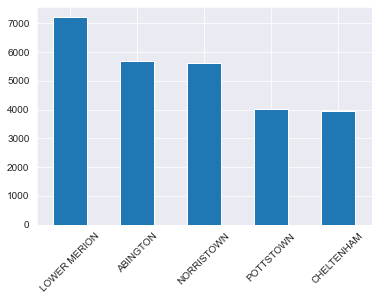

In [12]:
df['twp'].value_counts().head().plot.bar()
plt.xticks(rotation=45)
plt.show()

#### Most 911 calls were made from: 'Lower Merion',  'ABINGTON', 'NORRISTOWN', 'POTTSTOWN', and 'CHELTENHAM'  

### Top 5 Title for 911 calls

In [13]:
df['title'].value_counts().head()

Traffic: VEHICLE ACCIDENT -    19525
Traffic: DISABLED VEHICLE -     5764
Fire: FIRE ALARM                5134
EMS: RESPIRATORY EMERGENCY      4810
EMS: CARDIAC EMERGENCY          4686
Name: title, dtype: int64

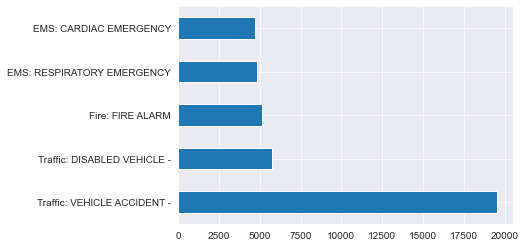

In [14]:
df['title'].value_counts().head().plot.barh()
plt.show()

#### More 911 calls were made for 'Traffic: VEHICLE ACCIDENT'

## Reasons For 911 calls

In [15]:
df["reasons"] = df['title'].str.split(' ').str.get(0)

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS:
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS:
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire:
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS:
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS:


In [16]:
df['reasons'].unique()

array(['EMS:', 'Fire:', 'Traffic:'], dtype=object)

In [17]:
df['reasons'].value_counts()

EMS:        44318
Traffic:    29254
Fire:       13004
Name: reasons, dtype: int64

<AxesSubplot:>

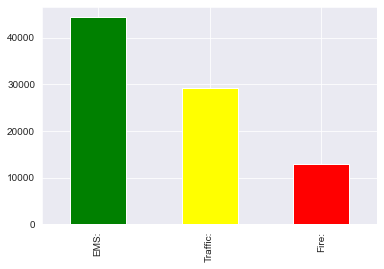

In [18]:
df['reasons'].value_counts().plot.bar(color=['green', 'yellow', 'red'])

#### Most 911 calls is for EMS

## Time Stamp for 911 calls

In [19]:
# Processing dataset for Time
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['year'] = df['timeStamp'].dt.year
df['month'] = df['timeStamp'].dt.month
df['time'] = df['timeStamp'].dt.time
df['dayofweek'] = df['timeStamp'].dt.dayofweek
df['date'] = df['timeStamp'].dt.date
df['dayofweek'] = df['dayofweek'].map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thur',
                                       4: 'Fri', 5:'Sat', 6: 'Sun'})

In [20]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons,year,month,time,dayofweek,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS:,2015,12,17:40:00,Thur,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS:,2015,12,17:40:00,Thur,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire:,2015,12,17:40:00,Thur,2015-12-10


<AxesSubplot:xlabel='dayofweek', ylabel='count'>

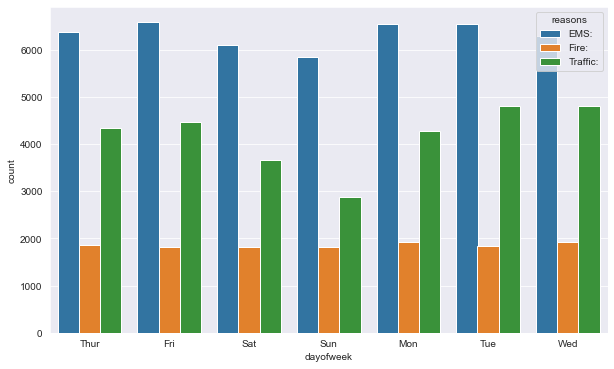

In [21]:
plt.figure(figsize=(10, 6))

sns.countplot(x='dayofweek', data=df, hue='reasons')


#### More 911 calls came in on Monday, Tuesday and Friday

<AxesSubplot:xlabel='month', ylabel='count'>

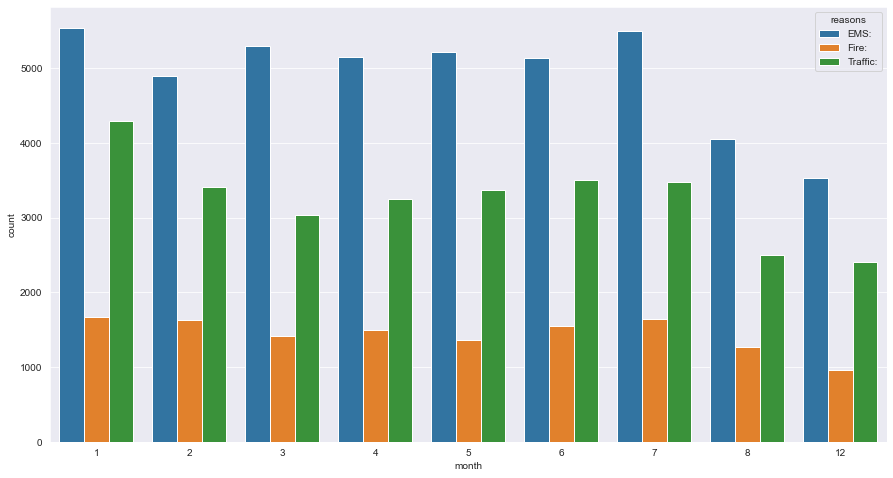

In [22]:
plt.figure(figsize=(15, 8))
sns.countplot(x='month', data=df, hue='reasons')


#### Most 911 calls for the month was in January and July

<AxesSubplot:xlabel='year', ylabel='count'>

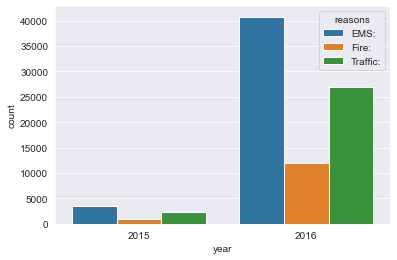

In [23]:
plt.figure()
sns.countplot(x='year', data=df, hue='reasons')

#### for the year, most 911 calls was in year 2016